In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
models = ['lr', 'dt', 'rf', 'bdt', 'svm']
data = dict()
for model in models:
    data[model] = dict()

In [3]:
def create_data_frame(file_name):
    full_file_name = os.path.join("./models", file_name)
    with open(full_file_name, 'r') as f:
        content = f.readlines()

    train_time = float([line.split('train time: ')[1].strip() for line in content if 'train time:' in line][0])
    accuracy_v = None
    accuracy_te = None
    accuracy_tr = None
    for line in content:
        if 'accuracy v:' in line:
            accuracy_v = float(line.split('accuracy v: ')[1].split('%')[0])
        if 'accuracy te:' in line:
            accuracy_te = float(line.split('accuracy te: ')[1].split('%')[0])
        if 'accuracy tr:' in line:
            accuracy_tr = float(line.split('accuracy tr: ')[1].split('%')[0])
    
    matrix = []
    firstline = 0
    for i, line in enumerate(content):
        if 'confusion matrix' in line:
            firstline = i
            break
    lastline = 0
    for i, line in enumerate(content):
        if 'classification report' in line:
            lastline = i
            break
    for line in content[firstline+1:lastline]:
        if '[' in line:
            matrix.append([int(i) for i in line.replace('[','').replace(']','').strip().split()])
        else:
            matrix[-1] += [int(i) for i in line.replace(']','').strip().split()]
    matrix = np.array(matrix)

    classification_report = ''.join(content[lastline+1:])

    dataframe = dict()
    dataframe['train_time'] = train_time
    if accuracy_v is not None:
        dataframe['accuracy_v'] = accuracy_v
    if accuracy_te is not None:
        dataframe['accuracy_te'] = accuracy_te
    if accuracy_tr is not None:
        dataframe['accuracy_tr'] = accuracy_tr
    if matrix.shape[0] > 0:
        dataframe['confusion_matrix'] = matrix
    if len(classification_report) > 0:
        dataframe['classification_report'] = classification_report

    return dataframe

In [4]:
def plot_confusion_matrix(conf_matrix, show_none = True):
    class_names = ['none','lie','sit','stand','walk','run','cycle','nordic_walk','ascend_stairs','descend_stairs','vacuum_clean','iron','rope_jumping']
    if not show_none:
        conf_matrix = conf_matrix[1:,1:]
        class_names = class_names[1:]
    if conf_matrix.shape[0] != len(class_names):
        class_names = [str(i) for i in range(1,1+conf_matrix.shape[0])]
    fig, ax = plt.subplots()
    im = ax.imshow(conf_matrix, cmap=plt.cm.Blues)
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, conf_matrix[i, j],
                        ha="center", va="center", color="white")
            
    ax.set_title("Confusion matrix")
    plt.colorbar(im)

    plt.show()

In [5]:
for file_name in os.listdir("./models"):
    if not file_name.endswith('.txt'): continue
    segmented_file_name = file_name[:-4].split('_')

    key = ()
    for segment in segmented_file_name[1:]:
        if segment != 'metrics':
            key += (segment,)

    data[segmented_file_name[0]][key] = create_data_frame(file_name)

<h1>Processing Random Forest</h1>

Train Time: 3316.0325899124146
Train Accuracy: 100.0
Test Accuracy: 99.733



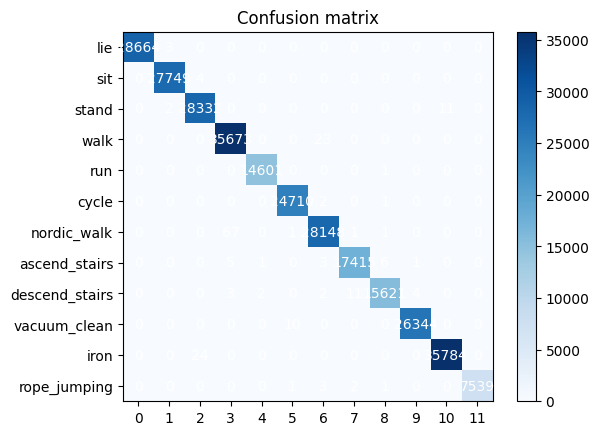

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    139400
           1       1.00      1.00      1.00     28720
           2       1.00      1.00      1.00     27785
           3       1.00      1.00      1.00     28387
           4       1.00      1.00      1.00     35767
           5       1.00      1.00      1.00     14625
           6       1.00      1.00      1.00     24744
           7       1.00      1.00      1.00     28249
          12       1.00      0.99      0.99     17565
          13       1.00      0.99      0.99     15826
          16       1.00      1.00      1.00     26426
          17       1.00      1.00      1.00     35822
          24       1.00      1.00      1.00      7563

    accuracy                           1.00    430879
   macro avg       1.00      1.00      1.00    430879
weighted avg       1.00      1.00      1.00    430879






Train Time: 1944.068921804428
Train Accuracy: 100.0
Test Accuracy: 98.512



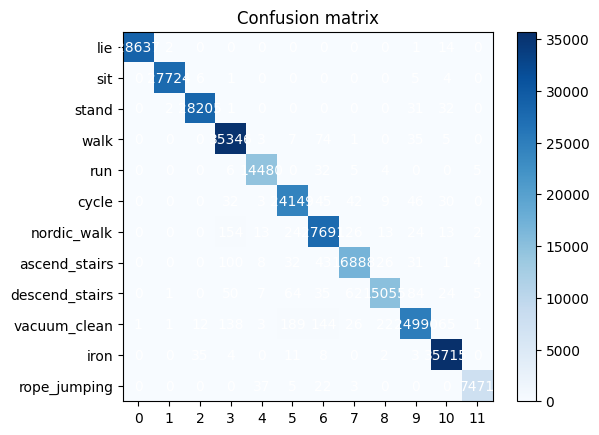

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    139400
           1       1.00      1.00      1.00     28720
           2       1.00      1.00      1.00     27785
           3       1.00      0.99      0.99     28387
           4       0.98      0.99      0.98     35767
           5       0.99      0.99      0.99     14625
           6       0.98      0.98      0.98     24744
           7       0.98      0.98      0.98     28249
          12       0.99      0.96      0.97     17565
          13       0.99      0.95      0.97     15826
          16       0.98      0.95      0.96     26426
          17       0.99      1.00      0.99     35822
          24       1.00      0.99      0.99      7563

    accuracy                           0.99    430879
   macro avg       0.99      0.98      0.98    430879
weighted avg       0.99      0.99      0.99    430879






In [6]:
for key, dataframe in data['rf'].items():
    display(HTML("<h1 style='font-size:36px'>{}</h1>".format(key[0])))
    print('Train Time:', dataframe['train_time'])
    print('Train Accuracy:', dataframe['accuracy_tr'])
    print('Test Accuracy:', dataframe['accuracy_te'])
    print()
    plot_confusion_matrix(dataframe['confusion_matrix'], False)
    print(dataframe['classification_report'])

    print()
    print()

<h1>Processing Decision Trees</h1>

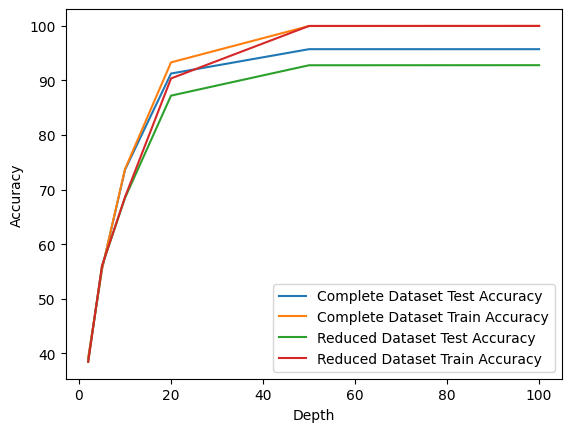

Train Time: 73.98650169372559
Train Accuracy: 100.0
Test Accuracy: 92.802



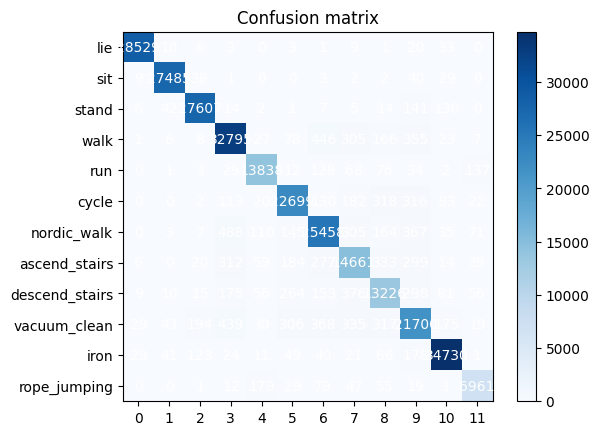

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    139400
           1       0.99      0.99      0.99     28720
           2       0.99      0.99      0.99     27785
           3       0.97      0.97      0.97     28387
           4       0.91      0.92      0.91     35767
           5       0.95      0.95      0.95     14625
           6       0.93      0.92      0.92     24744
           7       0.91      0.90      0.91     28249
          12       0.83      0.83      0.83     17565
          13       0.84      0.84      0.84     15826
          16       0.84      0.82      0.83     26426
          17       0.97      0.97      0.97     35822
          24       0.93      0.92      0.93      7563

    accuracy                           0.93    430879
   macro avg       0.92      0.92      0.92    430879
weighted avg       0.93      0.93      0.93    430879






Train Time: 219.19057893753052
Train Accuracy: 99.978
Test Accuracy: 95.738



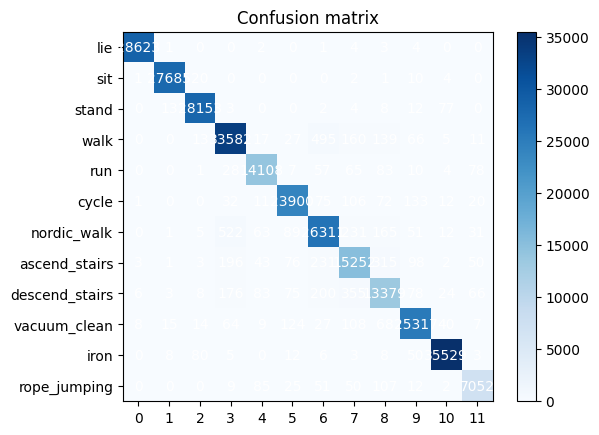

              precision    recall  f1-score   support

           0       0.95      0.96      0.96    139400
           1       1.00      1.00      1.00     28720
           2       1.00      1.00      1.00     27785
           3       0.99      0.99      0.99     28387
           4       0.94      0.94      0.94     35767
           5       0.97      0.96      0.97     14625
           6       0.97      0.97      0.97     24744
           7       0.93      0.93      0.93     28249
          12       0.87      0.87      0.87     17565
          13       0.87      0.85      0.86     15826
          16       0.96      0.96      0.96     26426
          17       0.99      0.99      0.99     35822
          24       0.94      0.93      0.94      7563

    accuracy                           0.96    430879
   macro avg       0.95      0.95      0.95    430879
weighted avg       0.96      0.96      0.96    430879






In [7]:
c_big = []
c_small = []
big_accuracy_te = []
red_accuracy_te = []
big_accuracy_tr = []
red_accuracy_tr = []
big_accuracy_v = []
red_accuracy_v = []
best_big = None
best_red = None
for key, dataframe in data['dt'].items():
    if key[0] == 'big':
        c_big.append(int(key[1]))
        big_accuracy_te.append(dataframe['accuracy_te'])
        big_accuracy_v.append(dataframe['accuracy_v'])
        big_accuracy_tr.append(dataframe['accuracy_tr'])
        if best_big is None or dataframe['accuracy_te'] > data['dt'][best_big]['accuracy_v']:
            best_big = key
    else:
        c_small.append(int(key[1]))
        red_accuracy_te.append(dataframe['accuracy_te'])
        red_accuracy_v.append(dataframe['accuracy_v'])
        red_accuracy_tr.append(dataframe['accuracy_tr'])
        if best_red is None or dataframe['accuracy_te'] > data['dt'][best_red]['accuracy_v']:
            best_red = key

big_accuracy_te = np.array(big_accuracy_te)
red_accuracy_te = np.array(red_accuracy_te)
big_accuracy_tr = np.array(big_accuracy_tr)
red_accuracy_tr = np.array(red_accuracy_tr)
c = np.array(c_big)

order = np.argsort(c_big)
c = c[order]
big_accuracy_te = big_accuracy_te[order]
big_accuracy_tr = big_accuracy_tr[order]

order = np.argsort(c_small)
red_accuracy_te = red_accuracy_te[order]
red_accuracy_tr = red_accuracy_tr[order]

plt.plot(c, big_accuracy_te, label='Complete Dataset Test Accuracy')
plt.plot(c, big_accuracy_tr, label='Complete Dataset Train Accuracy')
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title('Complete Dataset Accuracy')
# plt.legend()
# plt.show()

plt.plot(c, red_accuracy_te, label='Reduced Dataset Test Accuracy')
plt.plot(c, red_accuracy_tr, label='Reduced Dataset Train Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
# plt.title('Reduced Dataset Accuracy')
plt.legend()
plt.show()

for name, dataframe in [('Reduced', data['dt'][best_red]), ('Complete', data['dt'][best_big])]:
    display(HTML("<h1 style='font-size:36px'>{}</h1>".format(name)))
    print('Train Time:', dataframe['train_time'])
    print('Train Accuracy:', dataframe['accuracy_tr'])
    print('Test Accuracy:', dataframe['accuracy_te'])
    print()
    plot_confusion_matrix(dataframe['confusion_matrix'], False)
    print(dataframe['classification_report'])

    print()
    print()


<h1>Processing for Logistic Regression</h1>

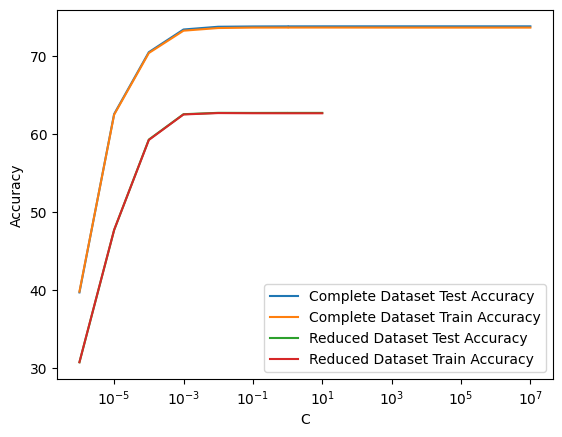

Train Time: 43.436912298202515
Train Accuracy: 62.701
Test Accuracy: 62.731



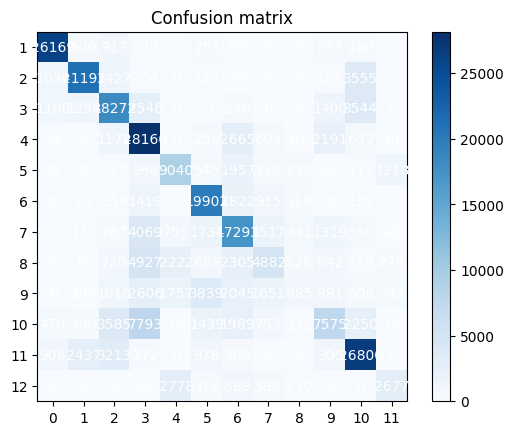

              precision    recall  f1-score   support

           1       0.87      0.91      0.89     28720
           2       0.81      0.76      0.79     27785
           3       0.59      0.64      0.62     28387
           4       0.53      0.79      0.63     35767
           5       0.55      0.62      0.58     14625
           6       0.66      0.80      0.73     24744
           7       0.55      0.61      0.58     28249
          12       0.43      0.28      0.34     17565
          13       0.31      0.06      0.09     15826
          16       0.48      0.29      0.36     26426
          17       0.69      0.75      0.72     35822
          24       0.58      0.35      0.44      7563

    accuracy                           0.63    291479
   macro avg       0.59      0.57      0.56    291479
weighted avg       0.61      0.63      0.61    291479






Train Time: 66.15054750442505
Train Accuracy: 73.602
Test Accuracy: 73.766



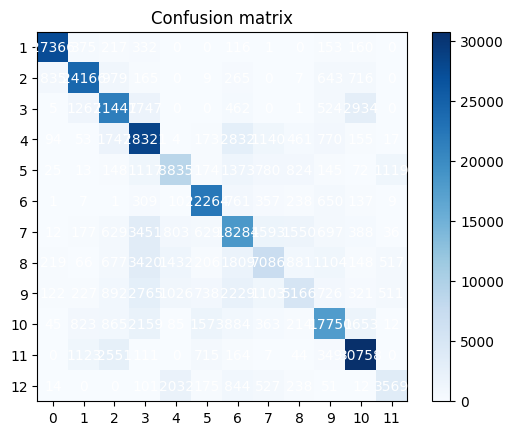

              precision    recall  f1-score   support

           1       0.95      0.95      0.95     28720
           2       0.85      0.87      0.86     27785
           3       0.71      0.76      0.73     28387
           4       0.64      0.79      0.71     35767
           5       0.62      0.60      0.61     14625
           6       0.84      0.90      0.87     24744
           7       0.61      0.65      0.63     28249
          12       0.55      0.40      0.46     17565
          13       0.54      0.33      0.41     15826
          16       0.75      0.67      0.71     26426
          17       0.82      0.86      0.84     35822
          24       0.62      0.47      0.53      7563

    accuracy                           0.74    291479
   macro avg       0.71      0.69      0.69    291479
weighted avg       0.73      0.74      0.73    291479






In [8]:
c_big = []
c_small = []
big_accuracy_te = []
red_accuracy_te = []
big_accuracy_tr = []
red_accuracy_tr = []
big_accuracy_v = []
red_accuracy_v = []
best_big = None
best_red = None
for key, dataframe in data['lr'].items():
    if key[0] == 'big':
        c_big.append(float(key[1]))
        big_accuracy_te.append(dataframe['accuracy_te'])
        big_accuracy_v.append(dataframe['accuracy_v'])
        big_accuracy_tr.append(dataframe['accuracy_tr'])
        if best_big is None or dataframe['accuracy_te'] > data['lr'][best_big]['accuracy_v']:
            best_big = key
    else:
        c_small.append(float(key[1]))
        red_accuracy_te.append(dataframe['accuracy_te'])
        red_accuracy_v.append(dataframe['accuracy_v'])
        red_accuracy_tr.append(dataframe['accuracy_tr'])
        if best_red is None or dataframe['accuracy_te'] > data['lr'][best_red]['accuracy_v']:
            best_red = key

big_accuracy_te = np.array(big_accuracy_te)
red_accuracy_te = np.array(red_accuracy_te)
big_accuracy_tr = np.array(big_accuracy_tr)
red_accuracy_tr = np.array(red_accuracy_tr)
c_big = np.array(c_big)

order = np.argsort(c_big)
c_big = c_big[order]
big_accuracy_te = big_accuracy_te[order]
big_accuracy_tr = big_accuracy_tr[order]

c_small = np.array(c_small)
order = np.argsort(c_small)
c_small = c_small[order]
red_accuracy_te = red_accuracy_te[order]
red_accuracy_tr = red_accuracy_tr[order]

plt.semilogx(c_big, big_accuracy_te, label='Complete Dataset Test Accuracy')
plt.semilogx(c_big, big_accuracy_tr, label='Complete Dataset Train Accuracy')
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title('Complete Dataset Accuracy')
# plt.legend()
# plt.show()

plt.semilogx(c_small, red_accuracy_te, label='Reduced Dataset Test Accuracy')
plt.semilogx(c_small, red_accuracy_tr, label='Reduced Dataset Train Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

for name, dataframe in [('Reduced', data['lr'][best_red]), ('Complete', data['lr'][best_big])]:
    display(HTML("<h1 style='font-size:36px'>{}</h1>".format(name)))
    print('Train Time:', dataframe['train_time'])
    print('Train Accuracy:', dataframe['accuracy_tr'])
    print('Test Accuracy:', dataframe['accuracy_te'])
    print()
    plot_confusion_matrix(dataframe['confusion_matrix'])
    print(dataframe['classification_report'])

    print()
    print()


<h1>Processing for SVM</h1>

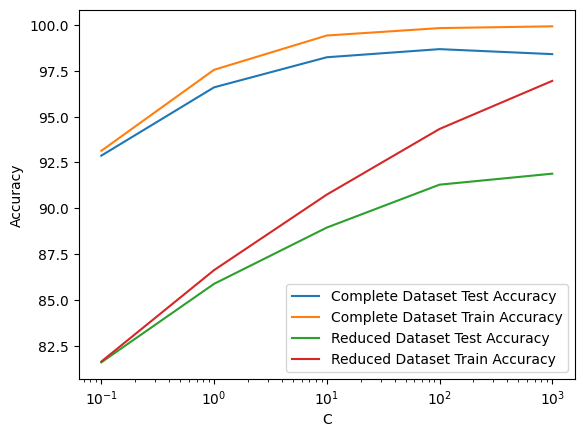

Train Time: 2619.4630131721497
Train Accuracy: 96.952
Test Accuracy: 91.886



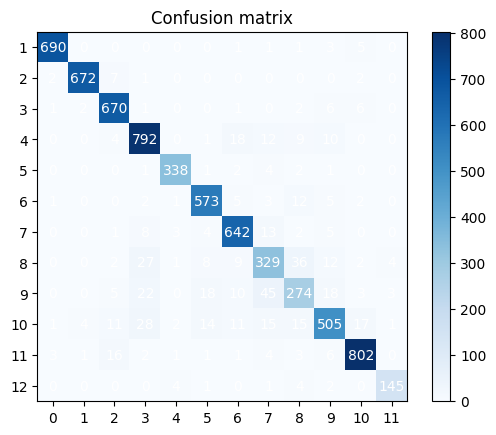

              precision    recall  f1-score   support

           1       0.99      0.98      0.99       701
           2       0.99      0.98      0.99       684
           3       0.94      0.97      0.95       689
           4       0.90      0.94      0.92       846
           5       0.97      0.97      0.97       349
           6       0.92      0.95      0.94       604
           7       0.92      0.95      0.93       678
          12       0.77      0.77      0.77       430
          13       0.76      0.69      0.72       398
          16       0.88      0.81      0.84       624
          17       0.96      0.95      0.96       840
          24       0.95      0.92      0.94       157

    accuracy                           0.92      7000
   macro avg       0.91      0.91      0.91      7000
weighted avg       0.92      0.92      0.92      7000






Train Time: 540.4819540977478
Train Accuracy: 99.932
Test Accuracy: 98.414



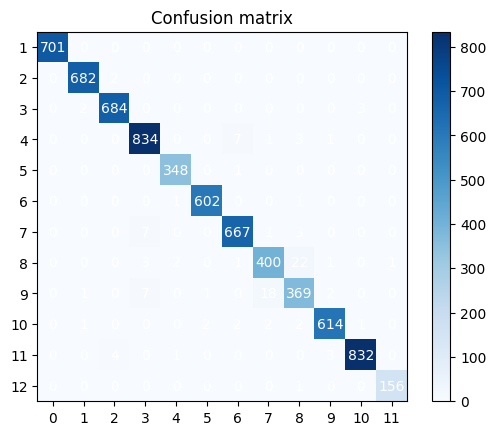

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       701
           2       0.99      1.00      1.00       684
           3       0.99      0.99      0.99       689
           4       0.98      0.99      0.98       846
           5       0.99      1.00      0.99       349
           6       1.00      1.00      1.00       604
           7       0.98      0.98      0.98       678
          12       0.95      0.93      0.94       430
          13       0.92      0.93      0.92       398
          16       0.99      0.98      0.99       624
          17       1.00      0.99      0.99       840
          24       0.99      0.99      0.99       157

    accuracy                           0.98      7000
   macro avg       0.98      0.98      0.98      7000
weighted avg       0.98      0.98      0.98      7000






In [9]:
c_big = []
c_small = []
big_accuracy_te = []
red_accuracy_te = []
big_accuracy_tr = []
red_accuracy_tr = []
big_accuracy_v = []
red_accuracy_v = []
best_big = None
best_red = None
for key, dataframe in data['svm'].items():
    if key[0] != 'rbf': continue
    if key[2] == 'False':
        c_big.append(float(key[1]))
        big_accuracy_te.append(dataframe['accuracy_te'])
        big_accuracy_v.append(dataframe['accuracy_v'])
        big_accuracy_tr.append(dataframe['accuracy_tr'])
        if best_big is None or dataframe['accuracy_te'] > data['svm'][best_big]['accuracy_v']:
            best_big = key
    else:
        c_small.append(float(key[1]))
        red_accuracy_te.append(dataframe['accuracy_te'])
        red_accuracy_v.append(dataframe['accuracy_v'])
        red_accuracy_tr.append(dataframe['accuracy_tr'])
        if best_red is None or dataframe['accuracy_te'] > data['svm'][best_red]['accuracy_v']:
            best_red = key

big_accuracy_te = np.array(big_accuracy_te)
red_accuracy_te = np.array(red_accuracy_te)
big_accuracy_tr = np.array(big_accuracy_tr)
red_accuracy_tr = np.array(red_accuracy_tr)
c = np.array(c_big)

order = np.argsort(c_big)
c = c[order]
big_accuracy_te = big_accuracy_te[order]
big_accuracy_tr = big_accuracy_tr[order]

order = np.argsort(c_small)
red_accuracy_te = red_accuracy_te[order]
red_accuracy_tr = red_accuracy_tr[order]

plt.semilogx(c, big_accuracy_te, label='Complete Dataset Test Accuracy')
plt.semilogx(c, big_accuracy_tr, label='Complete Dataset Train Accuracy')
# plt.xlabel('C')
# plt.ylabel('Accuracy')
# plt.title('Complete Dataset Accuracy')
# plt.legend()
# plt.show()

plt.semilogx(c, red_accuracy_te, label='Reduced Dataset Test Accuracy')
plt.semilogx(c, red_accuracy_tr, label='Reduced Dataset Train Accuracy')
plt.xlabel('C')
plt.ylabel('Accuracy')
# plt.title('Reduced Dataset Accuracy')
plt.legend()
plt.show()

for name, dataframe in [('Reduced', data['svm'][best_red]), ('Complete', data['svm'][best_big])]:
    display(HTML("<h1 style='font-size:36px'>{}</h1>".format(name)))
    print('Train Time:', dataframe['train_time'])
    print('Train Accuracy:', dataframe['accuracy_tr'])
    print('Test Accuracy:', dataframe['accuracy_te'])
    print()
    plot_confusion_matrix(dataframe['confusion_matrix'])
    print(dataframe['classification_report'])

    print()
    print()
